In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.ticker as tkr

In [211]:
df = pd.read_csv('./Resources/clean_data_ym_load.csv')
df.head()

,Origin Airport,Origin City,Origin Population,Destination Airport,Destination City,Destination Population,Distance,Flights,Passengers,Seats,Percent Full,Fly Date,Month,Year
0,MHK,"Manhattan, KS",122049,AMW,"Ames, IA",86219,254.0,1,21,30,0.70,200810,10,2008
1,EUG,"Eugene, OR",284093,RDM,"Bend, OR",76034,103.0,22,41,396,0.10,199011,11,1990
2,EUG,"Eugene, OR",284093,RDM,"Bend, OR",76034,103.0,19,88,342,0.26,199012,12,1990
3,EUG,"Eugene, OR",284093,RDM,"Bend, OR",76034,103.0,4,11,72,0.15,199010,10,1990
4,MFR,"Medford, OR",147300,RDM,"Bend, OR",76034,156.0,1,0,18,0.00,199002,2,1990


In [165]:
def numfmtTH(x, pos):
    s = '{}'.format(int(x/1000))
    return s

def numfmtMIL(x, pos):
    s = '{}'.format(int(x/1000000))
    return s

percentFormatter = tkr.PercentFormatter(xmax=1.0, decimals=0)
label_font = {
    'fontweight': 'bold',  
    'fontsize': 12,        
}

In [166]:
# Remove where two columns are equal, this step may be skipped
# New question: how may airports have flights originating and arriving at themselves?
count = df[df['Destination Airport'] == df['Origin Airport']]
df = df[df['Destination Airport'] != df['Origin Airport']]
len(count)

6517

#### Get Route Frequency and Count of Unique Routes

In [167]:
#Count of unique routes, summing the value in the Flights column (number of flights in the given month)
uniqueRoutes = df.groupby(['Origin Airport', 'Destination Airport'])['Flights'].sum().reset_index()
uniqueRoutes.head()

,Origin Airport,Destination Airport,Flights
0,1B1,BDL,1
1,ABE,ACT,1
2,ABE,ACY,1
3,ABE,ADS,1
4,ABE,AGS,2


In [168]:
#Total number of unique routes
uniqueRoutes.shape[0]

36449

In [169]:
# Amadas code for getting route info
df["Route"] = df["Origin Airport"] + "_" + df["Destination Airport"]
passenger_count = df[["Route", "Passengers"]].groupby("Route").sum().sort_values("Passengers", ascending=False)

demand = passenger_count.merge(df[["Route", "Origin Airport", "Origin City", "Destination Airport", "Destination City", 'Distance']], on="Route", how="inner").groupby("Route").first().sort_values("Passengers", ascending=False)
demand.head(10)

,Passengers,Origin Airport,Origin City,Destination Airport,Destination City,Distance
Route,,,,,,
OGG_HNL,32364612,OGG,"Kahului, HI",HNL,"Honolulu, HI",100.0
HNL_OGG,29744742,HNL,"Honolulu, HI",OGG,"Kahului, HI",100.0
LAX_HNL,28964154,LAX,"Los Angeles, CA",HNL,"Honolulu, HI",2556.0
HNL_LAX,28632161,HNL,"Honolulu, HI",LAX,"Los Angeles, CA",2556.0
LAS_LAX,26333721,LAS,"Las Vegas, NV",LAX,"Los Angeles, CA",236.0
LAX_LAS,26177809,LAX,"Los Angeles, CA",LAS,"Las Vegas, NV",236.0
LAX_SFO,25661782,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",337.0
SFO_LAX,25458207,SFO,"San Francisco, CA",LAX,"Los Angeles, CA",337.0
ATL_MCO,23483751,ATL,"Atlanta, GA",MCO,"Orlando, FL",403.0


In [170]:
# Amadas code for getting route info
# SLIGHTLY ALTERED FROM CELL ABOVE TO LOOK AT FLIGHT COUNT RATHER THAN PASSANGER LOAD
df["Route"] = df["Origin Airport"] + "_" + df["Destination Airport"]
flight_count = df[["Route", "Flights"]].groupby("Route").sum().sort_values("Flights", ascending=False)

flightDF = flight_count.merge(df[["Route", "Origin Airport", "Origin City", "Destination Airport", "Destination City", 'Distance']], on="Route", how="inner").groupby("Route").first().sort_values("Flights", ascending=False)
flightDF.head(10)

,Flights,Origin Airport,Origin City,Destination Airport,Destination City,Distance
Route,,,,,,
OGG_HNL,394909,OGG,"Kahului, HI",HNL,"Honolulu, HI",100.0
HNL_OGG,389964,HNL,"Honolulu, HI",OGG,"Kahului, HI",100.0
LAX_SFO,324666,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",337.0
SFO_LAX,311783,SFO,"San Francisco, CA",LAX,"Los Angeles, CA",337.0
LAX_LAS,296392,LAX,"Los Angeles, CA",LAS,"Las Vegas, NV",236.0
LAS_LAX,291759,LAS,"Las Vegas, NV",LAX,"Los Angeles, CA",236.0
PDX_SEA,285317,PDX,"Portland, OR",SEA,"Seattle, WA",129.0
SEA_PDX,280390,SEA,"Seattle, WA",PDX,"Portland, OR",129.0
PHX_LAX,258612,PHX,"Phoenix, AZ",LAX,"Los Angeles, CA",370.0


#### Pie Chart With Dest Code

In [171]:
#Get count of each occurance of a destination code
destFlights = df.groupby(['Destination Airport'])['Flights'].sum().reset_index()
destFlights.sort_values('Flights', inplace=True, ascending=False)
destFlights.head()

,Destination Airport,Flights
493,ORD,6896136
42,ATL,6544667
159,DFW,5987718
350,LAX,4096618
176,DTW,3448001


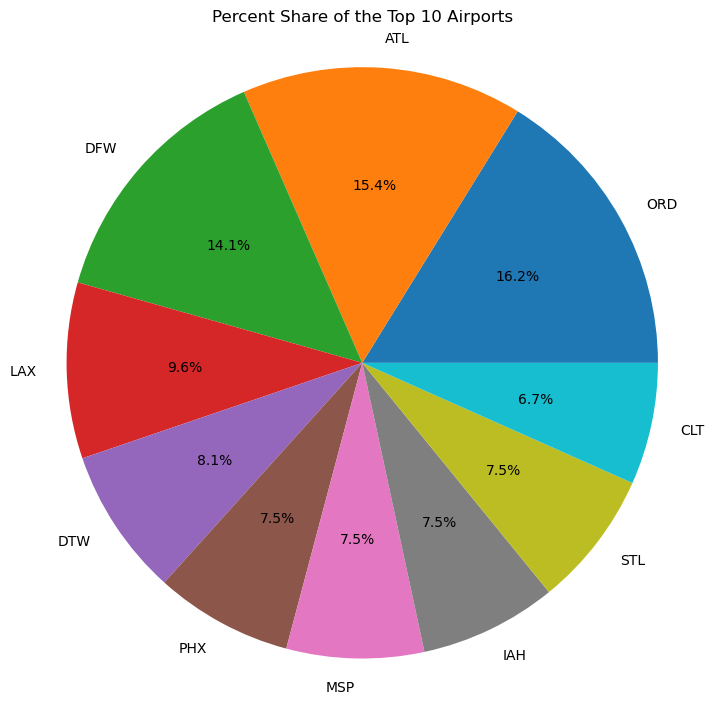

The above chart accounts for 31.73% of flights


In [172]:
#Shows the top N Airports. Change numEntries to change N
#Should note that looks identical to the arrivals, the difference is in the 0.01% area, numbers round to the save value
numEntries = 10
shorteneda = destFlights.iloc[:numEntries]

plt.pie(shorteneda['Flights'], labels=shorteneda['Destination Airport'], autopct='%1.1f%%', radius=2)
plt.title(f"Percent Share of the Top {numEntries} Airports", y=1.4)
plt.show()

shortSum = shorteneda['Flights'].sum()
longSum = destFlights['Flights'].sum()
pctShown = round(((shortSum/longSum) * 100), 2)

print(f"The above chart accounts for {pctShown}% of flights")

C:\Users\Zach\AppData\Local\Temp\ipykernel_15272\3020878964.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topN.loc[len(topN.index)] = [' ', everythingElse]
C:\Users\Zach\AppData\Local\Temp\ipykernel_15272\3020878964.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topN['Percent Makeup'] = round((topN['Flights']/topN['Flights'].sum()), 4)
C:\Users\Zach\AppData\Local\Temp\ipykernel_15272\3020878964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

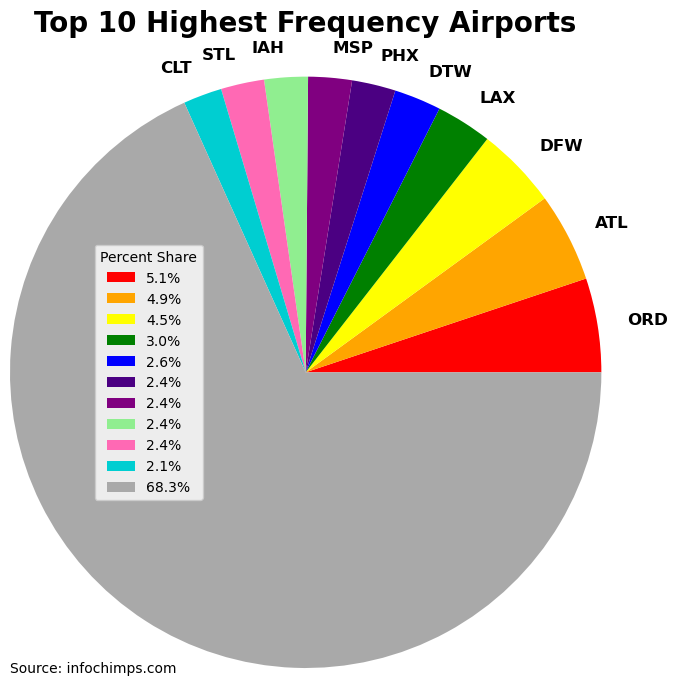

In [173]:
#Shows All flights, and the top N with respect to that
numEntries = 10

topN = destFlights.head(numEntries)
everythingElse = destFlights['Flights'][numEntries:].sum()

topN.loc[len(topN.index)] = [' ', everythingElse]

topN['Percent Makeup'] = round((topN['Flights']/topN['Flights'].sum()), 4)
topN['Percent Makeup'] = topN['Percent Makeup'].apply('{:.1%}'.format)

labels = topN['Destination Airport']
values = topN['Flights']

# plot the pie chart with 11 colors and custom text properties
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'lightgreen', 'hotpink', 'darkturquoise', 'darkgray']

plt.pie(values, labels=labels, colors=colors, radius=2, textprops=label_font)
plt.rcParams.update({'font.size' : 10})

source_note = 'Source: infochimps.com'
plt.text(-2, -2, source_note, fontsize=10, ha='left', va='center')

plt.legend(topN['Percent Makeup'], title='Percent Share', loc='center left', bbox_to_anchor=(-.09, .5))
plt.title(f'Top {numEntries} Highest Frequency Airports', y=1.4, fontweight='bold', fontsize=20, loc='center')
plt.show()

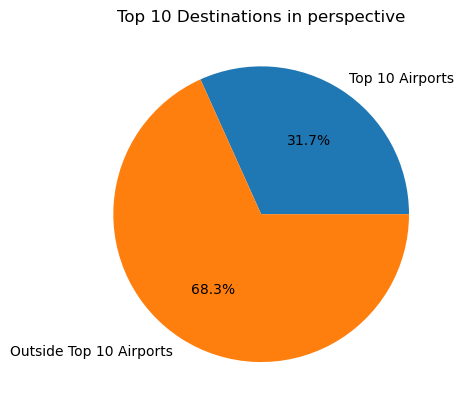

In [174]:
#Generated another chart to try and have a simple alternative. Size may need touching up
numEntries = 10

topN = destFlights.head(numEntries)
totalTopN = topN['Flights'].sum()
everythingElse = destFlights['Flights'][numEntries:].sum()

#topN.loc[len(topN.index)] = ['Outside Top 10', everythingElse]

labels = [f'Top {numEntries} Airports', f'Outside Top {numEntries} Airports']
values = [totalTopN, everythingElse]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title(f'Top {numEntries} Destinations in perspective')
plt.show()

#### Pie Chart With Orig Code

##### Keeping for generation purposes, not in presentation

In [175]:
origFlights = df.groupby(['Origin Airport'])['Flights'].sum().reset_index()
origFlights.sort_values('Flights', inplace=True, ascending=False)
origFlights.head()

,Origin Airport,Flights
481,ORD,6908333
40,ATL,6557923
155,DFW,5994470
345,LAX,4099817
173,DTW,3452572


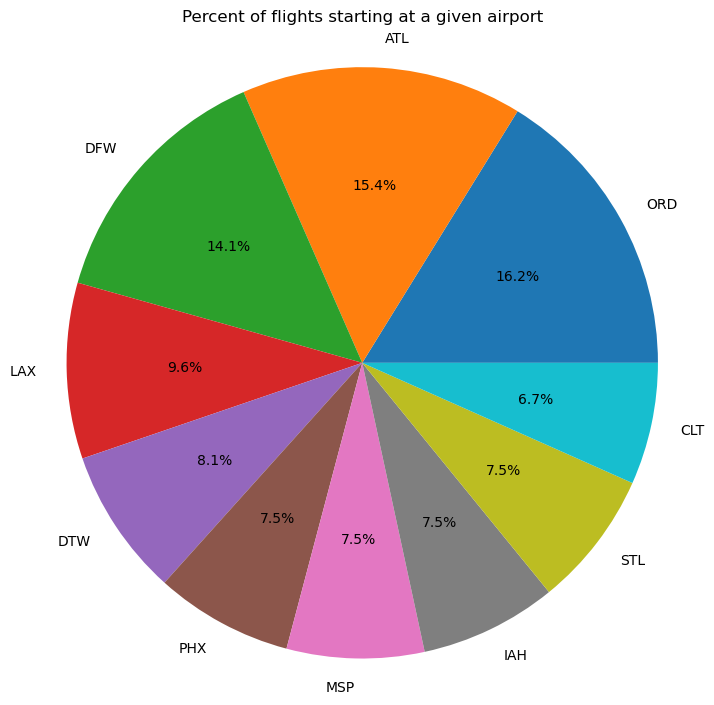

The above chart accounts for 31.77% of flights


In [176]:
numEntries = 10
shortenedb = origFlights.iloc[:numEntries]

plt.pie(shortenedb['Flights'], labels=shortenedb['Origin Airport'], autopct='%1.1f%%', radius=2)
plt.title("Percent of flights starting at a given airport", y=1.4)
plt.show()

shortSum = shortenedb['Flights'].sum()
longSum = origFlights['Flights'].sum()
pctShown = round(((shortSum/longSum) * 100), 2)

print(f"The above chart accounts for {pctShown}% of flights")

#### Percent Full vs Route Frequency

In [177]:
avgPctFull = df.groupby(['Origin Airport', 'Destination Airport'])['Percent Full'].mean().reset_index()
avgPctFull.head()

,Origin Airport,Destination Airport,Percent Full
0,1B1,BDL,0.120
1,ABE,ACT,0.000
2,ABE,ACY,0.710
3,ABE,ADS,NaN
4,ABE,AGS,0.875


In [178]:
fullFrame = pd.merge(uniqueRoutes, avgPctFull, on=['Origin Airport', 'Destination Airport'])
withNA = len(fullFrame)
fullFrame.dropna(inplace=True)
droppedNA = len(fullFrame)

print(f"There where {withNA - droppedNA} flights with NA values, assumed to be empty flights")

There where 5761 flights with NA values, assumed to be empty flights


In [179]:
#List of flights over capacity to reference/analyze
flightsOverCapacity = df[df['Percent Full'] > 1]
flightsOverCapacity = flightsOverCapacity[flightsOverCapacity['Flights'] != 0]
flightsOverCapacity = flightsOverCapacity[flightsOverCapacity['Seats'] != 0]
print(f'There are {len(flightsOverCapacity)} instances of flights running over capacity')
flightsOverCapacity.sort_values('Percent Full', ascending=False)

There are 258 instances of flights running over capacity


,Origin Airport,Origin City,Origin Population,Destination Airport,Destination City,Destination Population,Distance,Flights,Passengers,Seats,Percent Full,Fly Date,Month,Year,Route
3341600,TTN,"Trenton, NJ",331474,PHL,"Philadelphia, PA",11020546,37.0,3,1349,122,11.06,199811,11,1998,TTN_PHL
1898495,SEA,"Seattle, WA",5347562,ANC,"Anchorage, AK",289910,1448.0,1,462,233,1.98,199202,2,1992,SEA_ANC
2165887,DTW,"Detroit, MI",8761684,LAS,"Las Vegas, NV",938611,1750.0,1,469,256,1.83,199401,1,1994,DTW_LAS
1040966,ATL,"Atlanta, GA",3087755,IAH,"Houston, TX",3789490,689.0,1,553,360,1.54,199009,9,1990,ATL_IAH
1287123,FLL,"Fort Lauderdale, FL",4074690,MCO,"Orlando, FL",1239115,178.0,4,1205,792,1.52,199005,5,1990,FLL_MCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535636,MCO,"Orlando, FL",1502837,TTN,"Trenton, NJ",331474,897.0,1,133,132,1.01,199811,11,1998,MCO_TTN
1303916,BGR,"Bangor, ME",145702,MCO,"Orlando, FL",1422502,1322.0,6,1966,1950,1.01,199608,8,1996,BGR_MCO
2871314,PHX,"Phoenix, AZ",3496957,ABQ,"Albuquerque, NM",753670,328.0,42,1573,1554,1.01,200211,11,2002,PHX_ABQ
1387117,LAX,"Los Angeles, CA",25269954,PHX,"Phoenix, AZ",3496957,370.0,87,4372,4350,1.01,200211,11,2002,LAX_PHX


In [180]:
#Trimmed dataframe with only flights that aren't over capacity
ignoreOverflow = fullFrame[fullFrame['Percent Full'] < 1]
ignoreOverflow.head()

,Origin Airport,Destination Airport,Flights,Percent Full
0,1B1,BDL,1,0.120000
1,ABE,ACT,1,0.000000
2,ABE,ACY,1,0.710000
4,ABE,AGS,2,0.875000
5,ABE,ALB,1342,0.325946


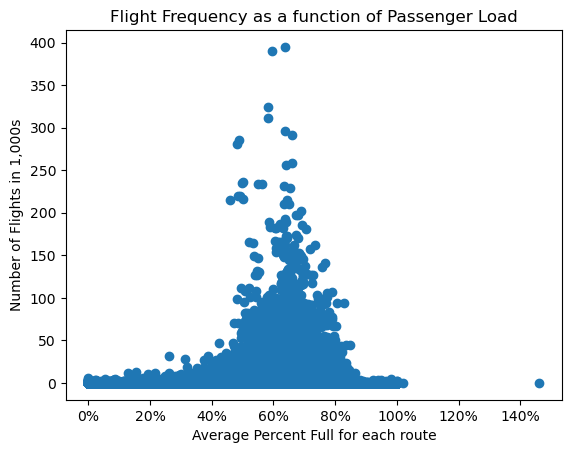

In [181]:
#Scatter plot with full frame/outliers
plt.scatter(fullFrame['Percent Full'], fullFrame['Flights'])
yfmt = tkr.FuncFormatter(numfmtTH)
plt.gca().yaxis.set_major_formatter(yfmt)
plt.gca().xaxis.set_major_formatter(percentFormatter)
plt.ylabel('Number of Flights in 1,000s')
plt.xlabel('Average Percent Full for each route')
plt.title('Flight Frequency as a function of Passenger Load')
plt.show()

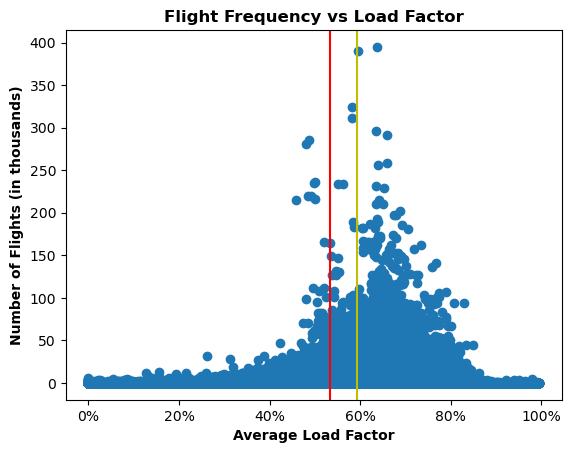

In [233]:
#Scatter plot without full frame/outliers
plt.scatter(ignoreOverflow['Percent Full'], ignoreOverflow['Flights'])
yfmt = tkr.FuncFormatter(numfmtTH)
plt.gca().yaxis.set_major_formatter(yfmt)
plt.gca().xaxis.set_major_formatter(percentFormatter)
plt.ylabel('Number of Flights (in thousands)', fontweight='bold')
plt.xlabel('Average Load Factor', fontweight='bold')
plt.title('Flight Frequency vs Load Factor', fontweight='bold')

medLoad = ignoreOverflow['Percent Full'].median()
meanLoad = ignoreOverflow['Percent Full'].mean()
plt.axvline(x = medLoad, color = 'y', label = 'axvline - full height')
plt.axvline(x = meanLoad, color = 'r', label = 'axvline - full height')

plt.show()

In [227]:
print(round(ignoreOverflow['Percent Full'].median(),2))

0.59


In [228]:
print(round(ignoreOverflow['Percent Full'].mean(),2))

0.53


In [236]:
#Regression function/p-value including outliers
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ignoreOverflow['Flights'], ignoreOverflow['Percent Full'])
print(pvalue)

print(f'p = {slope}f + {intercept}')
print(stderr)
print(str(stderr * stderr))

4.816104334469439e-58
p = 1.5651496336781492e-06f + 0.5269872457496576
9.724517357622705e-08
9.456623783870527e-15


In [238]:
st.ttest_ind(ignoreOverflow['Flights'], ignoreOverflow['Percent Full'])

TtestResult(statistic=46.549422495444496, pvalue=0.0, df=60824.0)

In [184]:
#Regression function/p-value excluding outliers
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ignoreOverflow['Flights'], ignoreOverflow['Percent Full'])
print(pvalue)

print(f'p = {slope}f + {intercept}')

4.816104334469439e-58
p = 1.5651496336781492e-06f + 0.5269872457496576


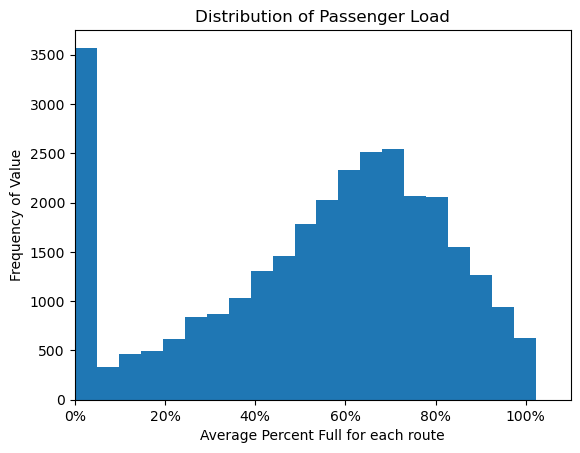

In [185]:
#Distribution check of all passenger loads
plt.hist(fullFrame[['Percent Full']], bins = 30)

plt.gca().xaxis.set_major_formatter(percentFormatter)
plt.ylabel('Frequency of Value')
plt.xlabel('Average Percent Full for each route')
plt.title('Distribution of Passenger Load')
ax = plt.gca()
ax.set_xlim([0.0, 1.1])
plt.show()

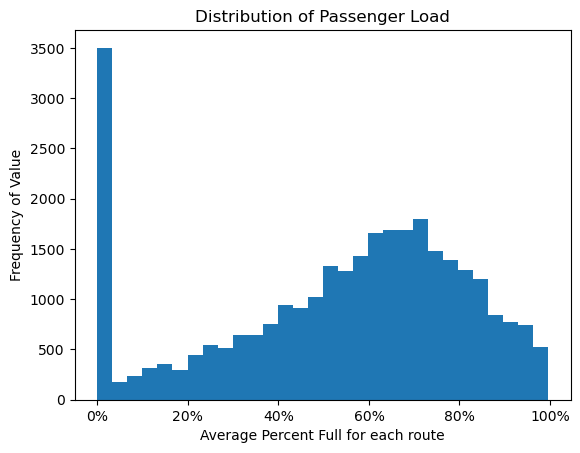

In [186]:
#Distribution of passenger load ignoring outliers
plt.hist(ignoreOverflow[['Percent Full']], bins = 30)

plt.gca().xaxis.set_major_formatter(percentFormatter)
plt.ylabel('Frequency of Value')
plt.xlabel('Average Percent Full for each route')
plt.title('Distribution of Passenger Load')
plt.show()

In [187]:
test = fullFrame[fullFrame['Percent Full'] == 0]
print(f'We currently have {len(test)} routes that are running at an average of 0% full')

We currently have 3256 routes that are running at an average of 0% full


In [188]:
dropEmptyRouteWithOverflow = fullFrame[fullFrame['Percent Full'] != 0]

In [189]:
dropEmptyRouteWithoutOverflow = ignoreOverflow[ignoreOverflow['Percent Full'] != 0]

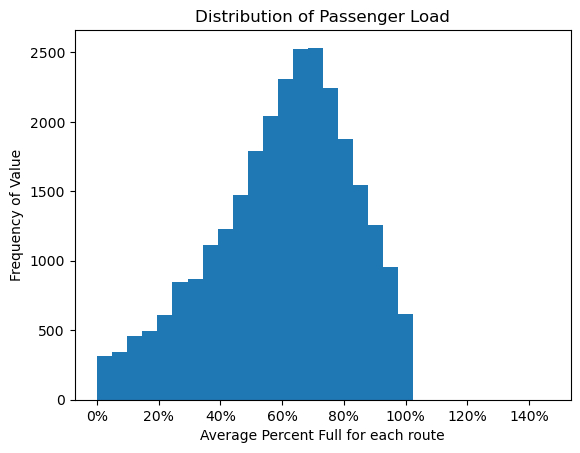

In [190]:
#Distribution of passenger load with upper outliers but no "empty" flights. 
plt.hist(dropEmptyRouteWithOverflow[['Percent Full']], bins = 30)

plt.gca().xaxis.set_major_formatter(percentFormatter)
plt.ylabel('Frequency of Value')
plt.xlabel('Average Percent Full for each route')
plt.title('Distribution of Passenger Load')
plt.show()

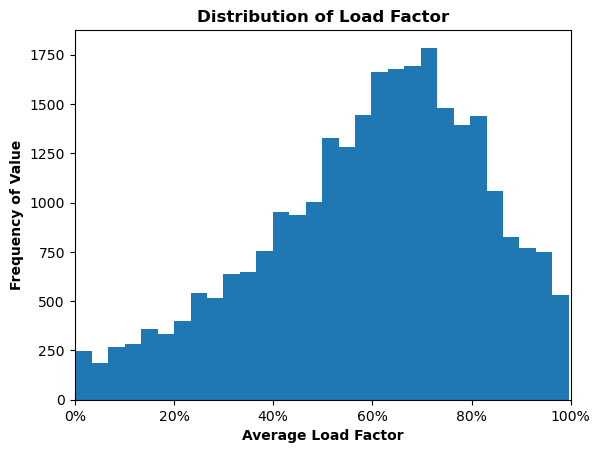

In [249]:
#Distribution of passenger load without upper outliers and no "empty" flights. 
plt.hist(dropEmptyRouteWithoutOverflow[['Percent Full']], bins = 30)

plt.gca().xaxis.set_major_formatter(percentFormatter)
plt.ylabel('Frequency of Value', fontweight='bold')
plt.xlabel('Average Load Factor', fontweight='bold')
plt.title('Distribution of Load Factor', fontweight='bold')
ax = plt.gca()
ax.set_xlim([0.0, 1])
plt.show()

#### Route Frequency vs Destination Population (E)

##### Shelved for now, running into odd issues with getting the population of the destination location

In [192]:
test = df[df['Destination Airport'] == 'TSS']
test.head()

,Origin Airport,Origin City,Origin Population,Destination Airport,Destination City,Destination Population,Distance,Flights,Passengers,Seats,Percent Full,Fly Date,Month,Year,Route
1729950,JFK,"New York, NY",37180170,TSS,"New York, NY",37180170,11.0,1,0,0,NaN,200212,12,2002,JFK_TSS
1730052,JRB,"New York, NY",37180170,TSS,"New York, NY",37180170,22.0,12,0,0,NaN,200212,12,2002,JRB_TSS
1730130,WTC,"New York, NY",37180170,TSS,"New York, NY",37180170,22.0,1,0,0,NaN,200212,12,2002,WTC_TSS
1736786,JFK,"New York, NY",37342640,TSS,"New York, NY",37342640,11.0,6,0,0,NaN,200304,4,2003,JFK_TSS
1736832,JRB,"New York, NY",37342640,TSS,"New York, NY",37342640,22.0,7,0,0,NaN,200304,4,2003,JRB_TSS


In [193]:
df2 = df.copy()
oriDest = 'Origin'

portCode = f'{oriDest} Airport'
coi = f'{oriDest} Population'

codeLookup = df2[[portCode, coi]].drop_duplicates(keep='first')
codeLookup = codeLookup.groupby(portCode)[coi].mean().reset_index()
codeLookup

,Origin Airport,Origin Population
0,1B1,61618.000000
1,ABE,742874.400000
2,ABI,155009.650000
3,ABQ,724727.300000
4,ABR,39415.235294
...,...,...
678,YKM,218058.100000
679,YKN,21619.500000
680,YNG,596641.800000
681,YUM,149640.300000


In [208]:
#Column of interest will be abreviated to coi
dataOfInterest = pd.merge(uniqueRoutes, codeLookup, on=portCode)
dataOfInterest.tail()

,Origin Airport,Destination Airport,Flights,Origin Population
36444,YUM,YKM,1,149640.3
36445,ZZV,MCI,1,85031.8
36446,ZZV,PDK,5,85031.8
36447,ZZV,SHV,2,85031.8
36448,ZZV,YIP,3,85031.8


In [209]:
withNA = len(dataOfInterest)
dataOfInterest.dropna(inplace=True)
droppedNA = len(dataOfInterest)

#No NA values found, skipping print statement
#print(f"There where {withNA - droppedNA} flights with NA values, assumed to be empty flights")

In [196]:
#dataOfInterest[coi].max()
dataOfInterest.sort_values(coi, ascending=False, inplace=True)
dataOfInterest

,Origin Airport,Destination Airport,Flights,Origin Population
34719,TSS,JRA,2,37643011.75
34720,TSS,JRB,172,37643011.75
18269,JRB,BDR,66,37643011.75
18270,JRB,EWR,1642,37643011.75
18271,JRB,JFK,2792,37643011.75
...,...,...,...,...
35715,WFB,DQU,2999,13198.75
35716,WFB,JNU,12,13198.75
35717,WFB,KTN,11647,13198.75
35718,WFB,MTN,1,13198.75


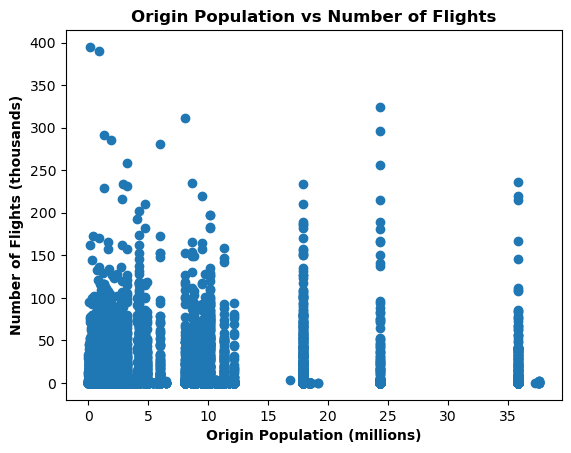

In [265]:
plt.scatter(dataOfInterest[coi], dataOfInterest['Flights'])
plt.ylabel('Number of Flights (thousands)', fontweight = 'bold')
plt.xlabel(f'{coi} (millions)', fontweight = 'bold')
plt.title(f'{coi} vs Number of Flights', fontweight = 'bold')

yfmt = tkr.FuncFormatter(numfmtTH)
plt.gca().yaxis.set_major_formatter(yfmt)
xfmt = tkr.FuncFormatter(numfmtMIL)
plt.gca().xaxis.set_major_formatter(xfmt)
#Change wording of axes and make it thousands rather than raw
#Change color of dots (teal? get hexcode/name)
#paleturqouise
plt.show()

In [267]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(dataOfInterest[coi], dataOfInterest['Flights'])
print(rvalue)

0.1692531608689197


#### Big City Small City Correlation

In [198]:
#This cell determines relative size of each city
destMed = df['Destination Population'].median()
origMed = df['Origin Population'].median()

destBins = [0, destMed, df['Destination Population'].max()]
origBins = [0, origMed, df['Origin Population'].max()]

glabels = ['Small City', 'Big City']

df['Origin Size'] = pd.cut(df['Origin Population'], origBins, labels=glabels)
df['Destination Size'] = pd.cut(df['Destination Population'], destBins, labels=glabels)


In [199]:
citySizeDf = df.groupby(['Origin Size', 'Destination Size'])['Flights'].sum().reset_index()

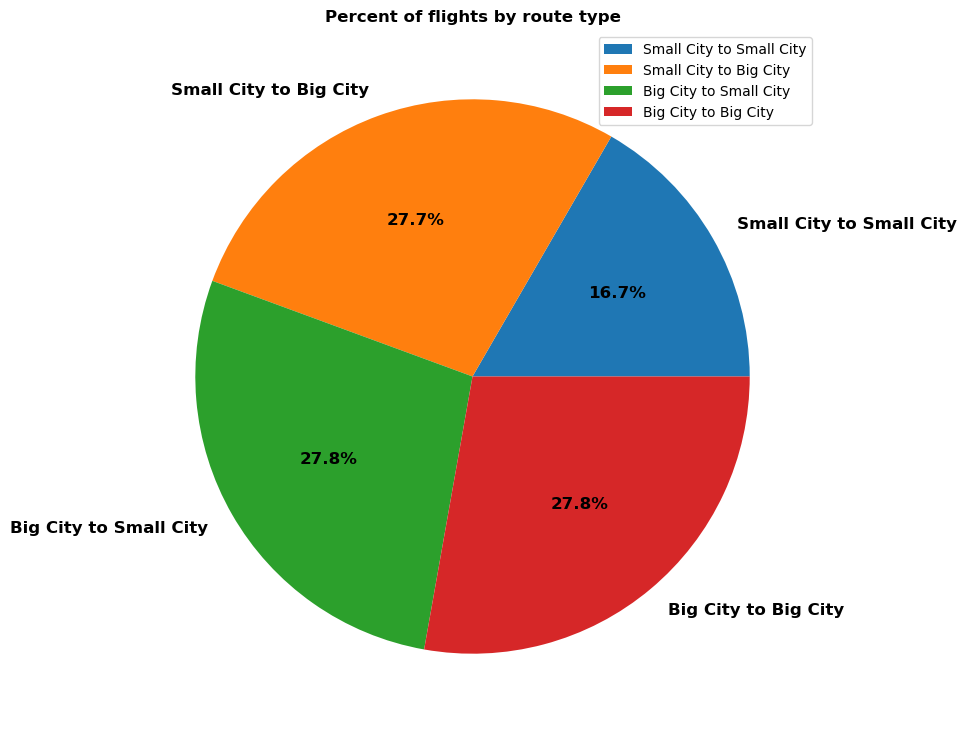

In [242]:
#Pie showing the percent share of route type. Route type is categorised by if it is leaving/arriving from a big/small city
#Of note: city category is determined by MEDIAN POPULATION as of writing. This can be changed by manipulating a cell above
labels = []
for item, row in citySizeDf.iterrows():
    labels.append(row['Origin Size'] + " to " + row['Destination Size'])

citySizeDf.index = labels

citySizeDf.plot(kind='pie', y='Flights', figsize=(9 , 9), autopct= '%1.1f%%', textprops=label_font)
plt.ylabel(' ')
plt.title('Percent of flights by route type', fontweight='bold')
plt.show()

#### Correlation between route distance and route frequency

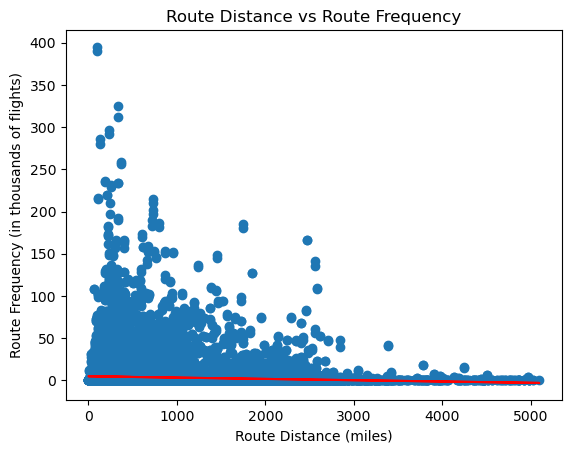

In [201]:
#Route distance compared with route frequency: do shorter or longer routes fly more often?
#Included linear regression line in this one, exponential may be a better fit
x = flightDF['Distance']
y = flightDF['Flights']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regLine = (slope*x) + intercept

plt.plot(x, regLine, color='r', label=f'y = {slope}x + {intercept}')


plt.scatter(x, y)
yfmt = tkr.FuncFormatter(numfmtTH)
plt.gca().yaxis.set_major_formatter(yfmt)
plt.title('Route Distance vs Route Frequency')
plt.xlabel('Route Distance (miles)')
plt.ylabel('Route Frequency (in thousands of flights)')
plt.show()

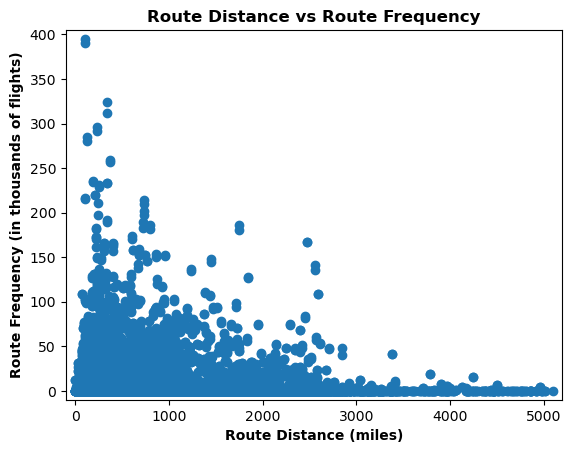

In [262]:
#Route distance compared with route frequency: do shorter or longer routes fly more often?
#Regression line excluded so we have a 'tidy' chart if we decide we need one.
x = flightDF['Distance']
y = flightDF['Flights']

plt.scatter(x, y)
yfmt = tkr.FuncFormatter(numfmtTH)
plt.gca().yaxis.set_major_formatter(yfmt)
plt.title('Route Distance vs Route Frequency', fontweight='bold')
plt.xlabel('Route Distance (miles)', fontweight='bold')
plt.ylabel('Route Frequency (in thousands of flights)', fontweight='bold')
ax = plt.gca()
ax.set_xlim([0 - 100, x.max() + 100])
ax.set_ylim([0 - 10000, y.max() + 10000])
plt.show()

In [203]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
print(pvalue)

print(f'p = {slope}f + {intercept}')

2.2572578128349553e-34
p = -1.5371348339976227f + 4911.704502696499
